In [ ]:
import os
import pandas as pd
import re
import string
from datetime import datetime



papers = pd.read_csv('FCovid_Jl20_Cleaned.csv', low_memory=False)
papers.head()


papers.drop(columns=['ID', 'ref_category_title', 'ref_url', 'pageid', 'verifiedby', 'title', 'published_date', 'country1', 'country2', 'country3', 'country4', 'article_source', 'ref_source', 'source_title', 'category'], axis=1)

for index, row in papers.iterrows():
  if row['lang'] == 'es':  
    continue
  else:
    papers.drop([index], inplace = True)

papers.head()




,ID,ref_category_title,ref_url,pageid,verifiedby,country,class,title,published_date,country1,country2,country3,country4,article_source,ref_source,source_title,content_text,category,lang,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,...,Unnamed: 853,Unnamed: 854,Unnamed: 855,Unnamed: 856,Unnamed: 857,Unnamed: 858,Unnamed: 859,Unnamed: 860,Unnamed: 861,Unnamed: 862,Unnamed: 863,Unnamed: 864,Unnamed: 865,Unnamed: 866,Unnamed: 867,Unnamed: 868,Unnamed: 869,Unnamed: 870,Unnamed: 871,Unnamed: 872,Unnamed: 873,Unnamed: 874,Unnamed: 875,Unnamed: 876,Unnamed: 877,Unnamed: 878,Unnamed: 879,Unnamed: 880,Unnamed: 881,Unnamed: 882,Unnamed: 883,Unnamed: 884,Unnamed: 885,Unnamed: 886,Unnamed: 887,Unnamed: 888,Unnamed: 889,Unnamed: 890,Unnamed: 891,Unnamed: 892
2845,FC26,False: Nostradamus predicted the coronavirus p...,https://www.poynter.org/?ifcn_misinformation=n...,https://www.poynter.org/ifcn-covid-19-misinfor...,Chequeado,Argentina,FALSE,Nostradamus predicted the coronavirus pandemic.,3/17/2020,Argentina,NaN,NaN,NaN,https://chequeado.com/verificacionfb/es-falso-...,poynter,Es falso que Nostradamus predijo el coronaviru...,"Hoy, Si apoyás este proyecto, Hoy, Delfina Cor...",NaN,es,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2846,FC28,False: Voice message of a so-called ombudsman ...,https://www.poynter.org/?ifcn_misinformation=v...,https://www.poynter.org/ifcn-covid-19-misinfor...,Chequeado,Argentina,FALSE,Voice message of a so-called ombudsman that s...,3/22/2020,Argentina,NaN,NaN,NaN,https://chequeado.com/el-explicador/no-la-defe...,poynter,"No, la Defensoría del Pueblo de la Ciudad no a...","Hoy, Si apoyás este proyecto, Hoy, Defensoría ...",NaN,es,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2847,FC195,False: Cuba discovered a serum that cures COVI...,https://www.poynter.org/?ifcn_misinformation=c...,https://www.poynter.org/ifcn-covid-19-misinfor...,Chequeado,Argentina,FALSE,Cuba discovered a serum that cures COVID-19.,3/17/2020,Argentina,NaN,NaN,NaN,https://chequeado.com/el-explicador/es-falso-q...,poynter,Es falso que Cuba descubrió un suero que cura ...,"Hoy, Si apoyás este proyecto, Hoy, Sebastián D...",NaN,es,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2848,FC323,FALSE: The Head of Government of the City of B...,https://www.poynter.org/?ifcn_misinformation=t...,https://www.poynter.org/ifcn-covid-19-misinfor...,Chequeado,Argentina,FALSE,The Head of Government of the City of Buenos ...,5/14/2020,Argentina,NaN,NaN,NaN,https://chequeado.com/verificacionfb/es-falso-...,poynter,Es falso este zócalo de Rodríguez Larreta: “Co...,"Hoy, Si apoyás este proyecto, Hoy, Lucía Garde...",NaN,es,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2849,FC440,FALSE: Bill Gates faces trial in India for ill...,https://www.poynter.org/?ifcn_misinformation=b...,https://www.poynter.org/ifcn-covid-19-misinfor...,Chequeado,"Argentina, India, Venezuela",FALSE,Bill Gates faces trial in India for illegally...,6/11/2020,Argentina,India,Venezuela,NaN,https://chequea

In [ ]:
#Importing Needed Packages

import spacy
import nltk
import gensim
import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)


In [ ]:
# Data cleaning
#Data Cleansing Begins

papers['content_text_processed'] = papers['content_text'].map(lambda x: re.sub('[,\.!?]', '', x))

papers['content_text_processed'] = papers['content_text_processed'].map(lambda x: x.lower())

papers['content_text_processed'].head()

2845    hoy si apoyás este proyecto hoy delfina corti ...
2846    hoy si apoyás este proyecto hoy defensoría de ...
2847    hoy si apoyás este proyecto hoy sebastián davi...
2848    hoy si apoyás este proyecto hoy lucía gardel c...
2849    hoy si apoyás este proyecto hoy ignacio corral...
Name: content_text_processed, dtype: object

In [ ]:
import gensim
from gensim.utils import simple_preprocess

def sentToWords(sentences):
    for sentences in sentences:
        yield (gensim.utils.simple_preprocess(str(sentences), deacc=True)) #deacc removes punctuation

data = papers.content_text_processed.values.tolist()
data_words = list(sentToWords(data))

print(data_words[:1][0][:30])

['hoy', 'si', 'apoyas', 'este', 'proyecto', 'hoy', 'delfina', 'corti', 'circula', 'en', 'facebook', 'whatsapp', 'una', 'imagen', 'que', 'sostiene', 'que', 'el', 'medico', 'frances', 'conocido', 'como', 'nostradamus', 'predijo', 'en', 'el', 'coronavirus', 'traves', 'de', 'su']


In [ ]:
#More Cleaning #Probably Obsolete

def cleaner(word):
  word = re.sub(r'((http\https)\:\/\/?[a-zA-Z0-9\.\/\?\:@\-_=#]+\.([a-zA-Z]){2,6}(a-zA-Z0-9\.&\/\?\:@\-_=#])*', '', word, flags=re.MULTILINE)
  word = re.sub(r'(?::|;|=)(?:-)?(?:\)|\(|D|P)', "", word)
  word = re.sub(r'ee.uu', 'eeuu', word)
  word = re.sub(r'\#\.',"", word)
  word = re.sub(r',', '', word)
  word = re.sub(r'\n', " ", word)
  word = re.sub(r'\.{3}', "", word)
  word = re.sub(r'\-', " ", word)
  word = re.sub(r'a{2,}', "", word)
  word = re.sub(r'é{2,}', "é", word)
  word = re.sub(r'i{2,}', "i", word)
  word = re.sub(r'ja{2,}', "ja", word)
  word = re.sub(r'á', "a", word)
  word = re.sub(r'é', "e", word)
  word = re.sub(r'í', "i", word)
  word = re.sub(r'ó', "o", word)
  word = re.sub(r'ú', "u", word)
  word = re.sub(r'ü', "u", word)
  word = re.sub(r'[^a-zA-Z]', " ", word)
  list_word_clean = []
  for w1 in word.split(" "):
    if w1.lower() not in stopwords:
      list_word_clean.append(w1.lower())

  return out_text

In [ ]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)

#faster way
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

In [ ]:
# Remove Stopwords, Make Bigrams and Lemmatize
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = stopwords.words('spanish')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

def remove_stopwords(texts):
    return  [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://aspacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
import spacy #for
# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download es
nlp = spacy.load('es_core_news_md', disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized[:1])

[['hoy', 'sostener', 'conocer', 'predecir', 'traves', 'siguiente', 'texto', 'extendera', 'plagar', 'ser', 'noche', 'tierra', 'colina', 'transformar', 'polvo', 'hombre', 'crepusculo', 'culminar', 'sombrar', 'ruindad', 'embargar', 'falso', 'librar', 'aparecer', 'ningun', 'texto', 'palabra', 'ahora', 'difundir', 'imagen', 'compartir', 'ademar', 'llegar', 'reiterar', 'vez', 'numerar', 'chequeado', 'verificar', 'conocer', 'hacer', 'popular', 'hacer', 'enorme', 'seriar', 'predicción', 'ano', 'futuro', 'recoger', 'suponer', 'profecias', 'centuria', 'capitulos', 'segun', 'imagen', 'viral', 'habria', 'predecir', 'coronavirus', 'traves', 'siguiente', 'texto', 'extendera', 'virus', 'ser', 'noche', 'colina', 'transformar', 'polvo', 'muerte', 'hombre', 'anciano', 'culminar', 'sombrar', 'embargar', 'falso', 'existir', 'ningun', 'registrar', 'suponer', 'profecia', 'chequeado', 'verificar', 'aparecer', 'vez', 'palabra', 'plagar', 'vez', 'vez', 'centuria', 'vez', 'registrar', 'palabra', 'senala', 'imag

In [ ]:
import gensim.corpora as corpora

#New Dictionary
id2word = corpora.Dictionary(data_lemmatized)

#New Corpus
texts = data_lemmatized

#Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

print(corpus[:1])

[[(0, 2), (1, 2), (2, 1), (3, 1), (4, 1), (5, 1), (6, 2), (7, 3), (8, 1), (9, 1), (10, 3), (11, 1), (12, 1), (13, 1), (14, 4), (15, 1), (16, 2), (17, 1), (18, 1), (19, 2), (20, 1), (21, 2), (22, 1), (23, 1), (24, 1), (25, 2), (26, 1), (27, 5), (28, 2), (29, 1), (30, 1), (31, 2), (32, 1), (33, 1), (34, 1), (35, 1), (36, 1), (37, 2), (38, 1), (39, 1), (40, 1), (41, 1), (42, 1), (43, 1), (44, 2), (45, 4), (46, 1), (47, 2), (48, 1), (49, 1), (50, 2), (51, 2), (52, 1), (53, 1), (54, 1), (55, 5), (56, 1), (57, 1), (58, 1), (59, 1), (60, 1), (61, 1), (62, 1), (63, 1), (64, 1), (65, 4), (66, 1), (67, 1), (68, 1), (69, 1), (70, 1), (71, 2), (72, 2), (73, 1), (74, 1), (75, 6), (76, 1), (77, 2), (78, 1), (79, 1), (80, 3), (81, 1), (82, 4), (83, 1), (84, 4), (85, 1), (86, 1), (87, 4), (88, 2), (89, 1), (90, 1), (91, 3), (92, 1), (93, 1), (94, 2), (95, 1), (96, 1), (97, 1), (98, 4), (99, 1), (100, 1), (101, 1), (102, 1), (103, 1), (104, 1), (105, 1), (106, 2), (107, 1), (108, 1), (109, 2), (110, 2)

In [ ]:
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=10, 
                                       random_state=100,
                                       chunksize=100,
                                       passes=10,
                                       per_word_topics=True)

In [ ]:
from pprint import pprint
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.038*"virus" + 0.023*"coronavirus" + 0.011*"nuevo" + 0.010*"explicar" + '
  '0.010*"decir" + 0.010*"tipo" + 0.010*"animal" + 0.010*"enfermedad" + '
  '0.009*"humano" + 0.008*"estudiar"'),
 (1,
  '0.011*"marzo" + 0.010*"medir" + 0.009*"presidente" + 0.009*"abril" + '
  '0.008*"publicar" + 0.008*"alarmar" + 0.007*"hacer" + 0.007*"trabajar" + '
  '0.007*"decir" + 0.006*"pm"'),
 (2,
  '0.015*"paciente" + 0.014*"usar" + 0.013*"vacuno" + 0.013*"tratamiento" + '
  '0.012*"coronavirus" + 0.012*"medicamento" + 0.010*"curar" + '
  '0.008*"enfermedad" + 0.008*"decir" + 0.008*"tambien"'),
 (3,
  '0.035*"caso" + 0.018*"personar" + 0.015*"dato" + 0.012*"paciente" + '
  '0.009*"mas" + 0.009*"fallecido" + 0.008*"contagiar" + 0.008*"confirmar" + '
  '0.008*"decir" + 0.008*"coronavirus"'),
 (4,
  '0.033*"virus" + 0.027*"usar" + 0.021*"aire" + 0.021*"mascarilla" + '
  '0.016*"superficie" + 0.016*"personar" + 0.015*"mano" + 0.014*"recomendar" + '
  '0.011*"transmision" + 0.011*"contactar"'),
 (5,

In [ ]:
from gensim.models import CoherenceModel

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.46856499766823284


In [ ]:
#tuning Hyperparemeters - (Number of Topics (k), Dirichlet hyperparameter alpha (Document-Topic Density), Word-Topic Density) - defining function to increase eficiney

def compute_coherence_values(corpus, dictionary, k):
  lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=k, 
                                       random_state=100,
                                       chunksize=100,
                                       passes=10,
                                       per_word_topics=True)
  coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')

  return coherence_model_lda.get_coherence()

In [ ]:
import numpy as np
import tqdm
grid = {}
grid['Validation_Set'] = {}
# Topics range
min_topics = 2
max_topics = 17
step_size = 1
topics_range = range(min_topics, max_topics, step_size)
# Alpha parameter
alpha = list(np.arange(0.01, 1, 0.3))
alpha.append('symmetric')
alpha.append('asymmetric')
# Beta parameter
beta = list(np.arange(0.01, 1, 0.3))
beta.append('symmetric')
# Validation sets
num_of_docs = int(len(corpus))
corpus_sets = [gensim.utils.ClippedCorpus(corpus, num_of_docs*0.75), 
               corpus]
corpus_title = ['75% Corpus', '100% Corpus']
model_results = {'Validation_Set': [],
                 'Topics': [],
                 'Alpha': [],
                 'Beta': [],
                 'Coherence': []
                }
averageDict = {}
# Can take a long time to run
if 1 == 1:
    pbar = tqdm.tqdm(total=55)
    
    for k in topics_range:
      
      model_results['Topics'].append(k)
      for i in range(0, 5):
        # iterate through alpha values
        # get the coherence score for the given parameters
        cv = compute_coherence_values(corpus, id2word, k)
        # Save the model results
        if k in averageDict:
          averageDict[k].append(cv)
        else:
          averageDict[k] = [cv]
            
        pbar.update(1)
    
    pbar.close()

for averageList in averageDict.values():
  model_results['Coherence'].append(sum(averageList) / len(averageList))

100%|██████████| 55/55 [24:49<00:00, 27.08s/it]


In [ ]:
#Printing Results
print(averageDict)
print(model_results['Topics'])
print(model_results['Coherence'])

maxCoherence = max(model_results['Coherence'])
index1 = model_results['Coherence'].index(maxCoherence)
numTopics = model_results['Topics'][index1]
print('Optimal Topcis: ' + str(numTopics))

{2: [0.34225780111179716, 0.34225780111179716, 0.34225780111179716, 0.36239947804317485, 0.36239947804317485], 3: [0.40410765219268024, 0.4607258741111934, 0.457046643029583, 0.4618648410095676, 0.4616811571650319], 4: [0.39994456056271505, 0.390004421354802, 0.39994456056271505, 0.4149261868147913, 0.4000689937790122], 5: [0.44562309397138894, 0.4330491047790712, 0.446028300291707, 0.4453793733783303, 0.44078880730623665], 6: [0.42247066460625043, 0.42907211681649526, 0.42247066460625043, 0.43406393463874854, 0.4291161676824495], 7: [0.4475473125793869, 0.4544397559148158, 0.4526342408786449, 0.454005283089806, 0.4533454639551443], 8: [0.46690669790724176, 0.4600272819110902, 0.4722249172757482, 0.4572974257440683, 0.4601122928518511], 9: [0.4727649221115603, 0.4775450914416351, 0.47686947432900134, 0.470748988520121, 0.47400981393726965], 10: [0.45864979987331067, 0.45132760976210007, 0.4521507140241733, 0.452132676148834, 0.46431209222884295], 11: [0.4575786521889136, 0.457245836867

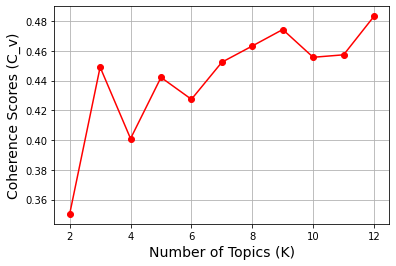

In [ ]:
# plotting results

import matplotlib.pyplot as plt

plt.plot(model_results['Topics'], model_results['Coherence'], color='red', marker = 'o')
plt.ylabel('Coherence Scores (C_v)', fontsize=14)
plt.xlabel('Number of Topics (K)', fontsize=14)
plt.grid(True)
plt.show()

In [ ]:
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=numTopics, 
                                           random_state=100,
                                           chunksize=100,
                                           passes=10,
                                           alpha=0.01,
                                           eta=0.9)

In [ ]:
import pyLDAvis.gensim_models
import pickle 
import pyLDAvis
# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_prepared = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
LDAvis_prepared

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable
/usr/local/lib/python3.7/dist-packages/past/builtins/misc.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Mapping
/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_lda.py:29: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  EPS = np.finfo(np.float).ep

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
7     -0.219092 -0.083130       1        1  45.823183
11    -0.241593 -0.076591       2        1  40.196553
0     -0.179883  0.191512       3        1  13.080754
4      0.076047 -0.003931       4        1   0.553759
3      0.072830 -0.004433       5        1   0.247576
10     0.070569 -0.003428       6        1   0.036543
5      0.070200 -0.003352       7        1   0.018714
2      0.070470 -0.003499       8        1   0.015129
1      0.070161 -0.003282       9        1   0.011092
8      0.070124 -0.003312      10        1   0.008347
6      0.070084 -0.003277      11        1   0.004175
9      0.070084 -0.003277      12        1   0.004175, topic_info=             Term         Freq        Total Category  logprob  loglift
2440         bulo  1458.000000  1458.000000  Default  30.0000  30.0000
128         virus  2289.000000  2289.000000  Default  29.0000  29.0000
198       tambien  1980.000000  1980.000000  Default  28.0000  28.0000
740         junio  1077.000000  1077.000000  Default  27.0000  27.0000
1843     batallar   497.000000   497.000000  Default  26.0000  26.0000
...           ...          ...          ...      ...      ...      ...
25        conocer     0.001049   271.810630  Topic12  -9.3831  -2.3811
26      consultar     0.001049   285.024743  Topic12  -9.3831  -2.4285
27    coronavirus     0.001049  3060.944354  Topic12  -9.3831  -4.8024
28          coser     0.001049   115.705020  Topic12  -9.3831  -1.5270
29          creer     0.001049   241.485761  Topic12  -9.3831  -2.2628

[673 rows x 6 columns], token_table=       Topic      Freq    Term
term                          
0          1  0.860376   abril
0          2  0.130892   abril
0          3  0.007981   abril
4444       1  0.013317  acidar
4444       2  0.958858  acidar
...      ...       ...     ...
4230       3  0.096686    voto
11454      1  0.272527      µg
11454      2  0.272527      µg
11454      3  0.272527      µg
11454      4  0.272527      µg

[1575 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[8, 12, 1, 5, 4, 11, 6, 3, 2, 9, 7, 10])

In [ ]:
#pip installing stuff
!pip install --upgrade gensim

Requirement already up-to-date: gensim in /usr/local/lib/python3.7/dist-packages (4.0.1)


In [ ]:
!pip install pyldavis

In [ ]:
!pip install spacy

In [ ]:
!python -m spacy download es_core_news_md

✔ Download and installation successful
You can now load the model via spacy.load('es_core_news_md')


In [ ]:
!pip install python-Levenshtein

     |████████████████████████████████| 51kB 3.0MB/s 
  Created wheel for python-Levenshtein: filename=python_Levenshtein-0.12.2-cp37-cp37m-linux_x86_64.whl size=149817 sha256=4bf27b508a4670724afaff042d8c6d956ae5eee22ac62a7afcbb04393c8e12ee
  Stored in directory: /root/.cache/pip/wheels/b3/26/73/4b48503bac73f01cf18e52cd250947049a7f339e940c5df8fc
Successfully built python-Levenshtein
